#Wine Prediction - Mutliclass Classification

In this section we will be working with a wine dataset and using it to predict the quality of a wine based on its chemical composition using the Random Forest Classifer.

Before we get started, we need to import the following libraries:

1. Numpy - Fundamental package for scientific computing with Python
2. Pandas - Library providing high-performance, easy-to-use data structures and data analysis tools.
3. Seaborn - Python data visualization library
4. Matplotlib -  Python 2D plotting library 
5. SKLearn - Simple and efficient tools for data mining and data analysis

In [0]:
# Import all the necessary libraries
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

##Load Dataset
First of all we want to use the pandas library to read the CSV file that contains the dataset

ToDo:
- Load in the data
- View the number of columns and rows in the dataset
- View the first few rows of data

In [0]:
url = 'https://aicamp2019.s3.amazonaws.com/winequality-red.csv'

#Load in the data from url
wine = pd.read_csv(url, sep=';')


In [40]:
# View the number of columns and rows in the dataset
wine.shape


# View first few entries in the dataset
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Matplotlib and Seaborn Library
Matplotlib is a library to create 2D graphs and plots. It has a very useful module called pyplot which provides tools to control different graph features. We imported it at the start of the notebook through ```import matplotlib.pyplot as plt```. Example matplotlib graphs are:

![](https://matplotlib.org/3.1.1/_images/sphx_glr_sample_plots_001.png)

We will also be using a library called Seaborn. It's a python data visualization library based on matplotlib, and is very useful for seeing the data we're working with. We imported it at the start of the notebook as ``` sns ```. More information on the library can be found at https://seaborn.pydata.org/index.html if you want to look into it further.

Examples of the type of graphs that can be plotted with Seaborn:
![](https://miro.medium.com/max/1400/0*GVUIGoDbtjf4znjN.png)


##Analyse the Data
There are a lot of attributes and information in this dataset so let's explore it using the matplotlib and seaborn libraries so we can understand and see visually what data we're working with.

ToDo:
<br>
plot bar graphs of:
- quality vs. chlorides
- quality vs. volatile acidity
- quality vs. sulphates
- quality vs. alcohol

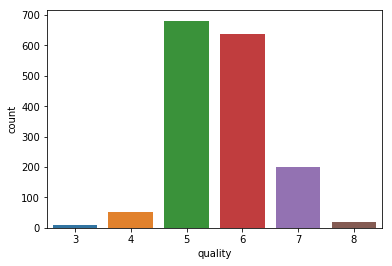

In [41]:
# Display wine quality histogram
wine['quality'].value_counts()
sns.countplot(wine['quality'])

Now let's plot some bar graphs to look at how the quality of the wine depends on some of the attributes.

Text(0.5, 1.0, 'Quality vs. Chlorides')

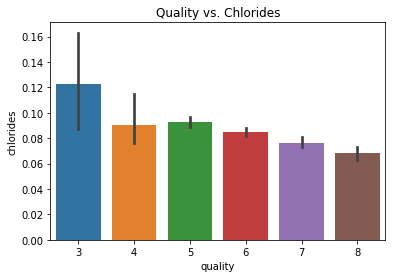

In [42]:
# Plot a bar graph showing quality vs. chlorides
fig = plt.figure()
sns.barplot(x = 'quality', y = 'chlorides', data = wine).set_title('Quality vs. Chlorides')

Text(0.5, 1.0, 'Quality vs Volatile Acidity')

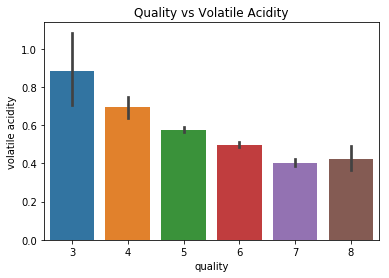

In [43]:
# Plot a bar graph showing quality vs. volatile acidity
sns.barplot(x  = 'quality', y = 'volatile acidity', data=wine).set_title('Quality vs Volatile Acidity')

Text(0.5, 1.0, 'Quality vs Sulphates')

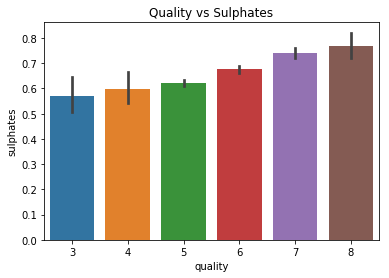

In [44]:
# Plot a bar graph showing quality vs. sulphates
sns.barplot(x = 'quality', y = 'sulphates', data = wine).set_title('Quality vs Sulphates')

Text(0.5, 1.0, 'Quality vs Alcohol')

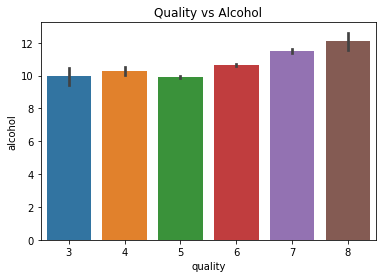

In [45]:
# Plot a bar graph showing quality vs. alcohol
sns.barplot(x = 'quality', y = 'alcohol', data = wine).set_title('Quality vs Alcohol')

Just from looking at these graphs it's easy to see that:
- higher chlorides and volatile acidity = lower quality
- higher sulphates and alcohol = better quality

## Split the Data
Now we need to split the data like we have done before.

ToDo:
- Prepare the data to be split
- Use the train_test_split function to split our data into training and validation data

In [0]:
# Split data into X and Y 
X = wine.drop('quality', axis = 1) #axis = 1 refers to dropping the column 
Y = wine['quality']

#Use train_test_split to split up the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Train the Model
Our data is prepared so now we can go ahead and train our chosen model, a RandomForestClassifier. 

ToDo:
- Define the model
- Train the model
- Predict

In [0]:
# Define the model
rfc = RandomForestClassifier(n_estimators = 200)

# Train the model by fiting it
rfc.fit(x_train, y_train)


# Use the model to predict on the test data and print the result
y_prediction = rfc.predict(x_test)

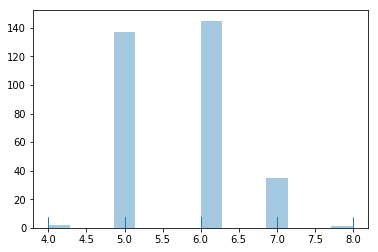

In [48]:
# We can also use the seaborn library to make a graph of the predicitions, to see which classes we're predicting more often
sns.distplot(y_prediction, kde=False, rug=True);

#Analysis of Model

ToDo:
- Look at the models confusion matrix
- Look at the models accuracy


In [49]:
# Show confusion matrix
print(metrics.confusion_matrix(y_test,y_prediction))

[[  0   0   1   0   0   0]
 [  0   1   5   1   0   0]
 [  0   1 100  29   1   0]
 [  0   0  30  98   7   0]
 [  0   0   1  15  26   0]
 [  0   0   0   2   1   1]]


In [50]:
# Show model's accuracy
print(metrics.accuracy_score(y_test,y_prediction))

0.70625


In [51]:
# Finally use some SciKit learn's function to see other metrics
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.14      0.22         7
           5       0.73      0.76      0.75       131
           6       0.68      0.73      0.70       135
           7       0.74      0.62      0.68        42
           8       1.00      0.25      0.40         4

    accuracy                           0.71       320
   macro avg       0.61      0.42      0.46       320
weighted avg       0.70      0.71      0.70       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##Exercises

**1.** We can also split the wines into "bad" and "good" classes and do binary classification. The code below cuts the wines into the "bad" class if its quality is 6-2 and the "good" class if it's quality is 7-8. One hot encoding is then used to re-label the "bad" class as 0 and the "good" class as 1.

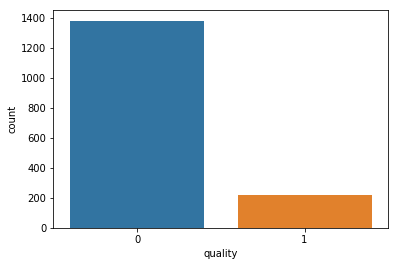

In [52]:
#divide the wines into good and bad by the quality

binarys = (2, 6.5, 8)
groups = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins= binarys, labels = groups)

#one hot encode our labels bad = 0 and good =1
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()
sns.countplot(wine['quality'])

Now use this re-labeled binary data  to do binary classification using RFCs

In [58]:
# Insert answer here
#Define x and y values 
x = wine.drop('quality', axis=1)
y = wine['quality']

#Define training split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Define and Train the model 
rfc = KNeighborsClassifier()
rfc.fit(x_train,y_train)

#Make predictions with x test data
y_prediction = rfc.predict(x_test)

#Analyse with Metrics tools 
print('Confusion Matrix: \n%s' % metrics.confusion_matrix(y_test,y_prediction))

print('\n Accuracy: \n%s' % metrics.accuracy_score(y_test, y_prediction))

print('\n Classification Report: \n%s' % metrics.classification_report(y_test,y_prediction))

Confusion Matrix: 
[[263  12]
 [ 33  12]]

 Accuracy: 
0.859375

 Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       275
           1       0.50      0.27      0.35        45

    accuracy                           0.86       320
   macro avg       0.69      0.61      0.63       320
weighted avg       0.83      0.86      0.84       320

